In [72]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np

from dateutil.relativedelta import relativedelta as rltd
import datetime as dt

from processDataYF import DataYFinance
import quantiTools as qt

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
tickers = ['ABEV3.SA', 'BBDC4.SA', 'MGLU3.SA','ITSA4.SA', "JHSF3.SA", "EZTC3.SA",
            "BEEF3.SA", "JBSS3.SA", "BBSE3.SA", "TAEE3.SA", "MULT3.SA", "PETR4.SA", "VALE3.SA",'^BVSP']


endDate = dt.date.today()

startDate = endDate - rltd(months=12)

In [34]:
print(startDate, endDate)

2021-08-12 2022-08-12


In [35]:
# MODO 0001 #

dados0002 = yf.download(tickers, startDate, endDate)

[*********************100%***********************]  14 of 14 completed


In [36]:
retornos = dados0002['Adj Close'].dropna().pct_change()
retornos

,ABEV3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,EZTC3.SA,ITSA4.SA,JBSS3.SA,JHSF3.SA,MGLU3.SA,MULT3.SA,PETR4.SA,TAEE3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,,,
2021-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-13,0.004222,0.004758,-0.013397,-0.024943,-0.008809,0.006119,0.008044,-0.013812,-0.033381,-0.003546,0.008591,0.000000,-0.008242,0.004084
2021-08-16,-0.015015,-0.008179,-0.025703,-0.047675,-0.020866,-0.008948,0.011491,-0.039216,-0.041934,-0.017349,-0.024191,0.001513,0.004617,-0.016618
2021-08-17,-0.004878,-0.003906,-0.013440,-0.024420,-0.022099,-0.013193,-0.021137,-0.049563,-0.005664,-0.022635,-0.000003,0.006798,-0.016544,-0.010706
2021-08-18,0.009191,-0.006536,-0.007063,0.011264,0.007667,0.002674,0.007324,0.024540,-0.024340,-0.012506,-0.008879,-0.010503,-0.033551,-0.010695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,-0.005450,0.012035,0.009571,0.031621,-0.008719,0.013498,-0.012393,-0.018303,-0.053892,-0.009980,0.019293,0.012169,0.012960,0.005477
2022-08-08,0.013699,0.003243,0.035463,0.039080,0.017042,0.013319,-0.036358,0.020339,0.034810,0.014516,0.050473,0.000707,0.008529,0.018127
2022-08-09,-0.004054,0.014547,0.010173,-0.059735,-0.050811,0.018620,-0.018698,-0.019934,-0.058104,-0.001590,0.016380,0.016254,0.020706,0.002297


In [46]:
endDate = dt.date.today()

startDate = endDate - rltd(months=12)


modo0003 = DataYFinance(tickers)
adjClose = modo0003.getAdjclose(startDate, endDate)
retornos0003 = modo0003.dReturns(adjClose)
retornos0003

[*********************100%***********************]  14 of 14 completed


,ABEV3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,EZTC3.SA,ITSA4.SA,JBSS3.SA,JHSF3.SA,MGLU3.SA,MULT3.SA,PETR4.SA,TAEE3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,,,
2021-08-13,0.004222,0.004758,-0.013397,-0.024943,-0.008809,0.006119,0.008044,-0.013812,-0.033381,-0.003546,0.008591,0.000000,-0.008242,0.004084
2021-08-16,-0.015015,-0.008179,-0.025703,-0.047675,-0.020865,-0.008948,0.011491,-0.039216,-0.041934,-0.017349,-0.024191,0.001513,0.004617,-0.016618
2021-08-17,-0.004878,-0.003906,-0.013440,-0.024420,-0.022100,-0.013193,-0.021137,-0.049563,-0.005664,-0.022635,-0.000003,0.006798,-0.016544,-0.010706
2021-08-18,0.009191,-0.006536,-0.007063,0.011264,0.007667,0.002674,0.007324,0.024540,-0.024340,-0.012506,-0.008879,-0.010503,-0.033551,-0.010695
2021-08-19,0.043716,-0.002193,0.003557,0.037129,0.008811,-0.008000,0.038004,0.016467,0.005839,0.008912,-0.005599,0.003791,-0.057055,0.004475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,-0.005450,0.012035,0.009571,0.031621,-0.008719,0.013498,-0.012393,-0.018303,-0.053892,-0.009980,0.019293,0.012169,0.012960,0.005477
2022-08-08,0.013699,0.003243,0.035463,0.039080,0.017042,0.013319,-0.036358,0.020339,0.034810,0.014516,0.050473,0.000707,0.008529,0.018127
2022-08-09,-0.004054,0.014547,0.010173,-0.059735,-0.050811,0.018620,-0.018698,-0.019934,-0.058104,-0.001590,0.016380,0.016254,0.020706,0.002297


In [47]:
modo0003.mReturns(adjClose)

,ABEV3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,EZTC3.SA,ITSA4.SA,JBSS3.SA,JHSF3.SA,MGLU3.SA,MULT3.SA,PETR4.SA,TAEE3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,,,
2021-08,0.031363,0.001298,-0.088038,-0.052154,0.026427,0.013778,0.035619,-0.087017,-0.130186,-0.064716,-0.009985,-0.038578,-0.096337,-0.015907
2021-09,-0.105263,-0.099477,0.046695,0.250000,-0.147761,-0.034662,0.189285,-0.104387,-0.213816,-0.098104,0.001471,-0.047994,-0.147146,-0.065684
2021-10,0.110457,-0.043797,0.107268,-0.067943,-0.200963,-0.079892,0.053413,-0.131088,-0.246165,-0.026800,-0.002938,0.024793,-0.060729,-0.067382
2021-11,-0.054738,0.001426,-0.054776,-0.088185,-0.006027,-0.041669,-0.062387,-0.058116,-0.278446,0.058315,0.083978,-0.036290,-0.023181,-0.015324
2021-12,-0.002379,-0.022252,-0.006226,0.235431,0.127343,-0.025588,0.093554,0.187234,-0.074359,-0.019391,0.085953,0.055670,0.114510,0.028524
2022-01,-0.029183,0.188027,0.115181,-0.100000,0.045477,0.157052,-0.075362,0.152330,-0.030471,0.148504,0.137083,0.056931,0.037327,0.072180
2022-02,0.015364,-0.106715,0.035202,0.133124,-0.178204,-0.016683,0.022798,-0.139969,-0.141429,0.027442,0.051005,0.015613,0.141091,0.006709
2022-03,0.013158,0.092911,0.109375,0.171138,0.094123,0.088834,0.037336,0.223679,0.134775,0.108194,-0.016176,0.140661,0.075806,0.060605
2022-04,-0.057143,-0.108279,-0.005086,0.064315,-0.164800,-0.143256,0.016653,-0.001522,-0.284457,0.006944,-0.009680,-0.003369,-0.128766,-0.101026


In [57]:
modo0003.dVol(adjClose)

ABEV3.SA    0.016916
BBDC4.SA    0.019022
BBSE3.SA    0.015934
BEEF3.SA    0.025226
EZTC3.SA    0.032209
ITSA4.SA    0.014856
JBSS3.SA    0.018859
JHSF3.SA    0.028529
MGLU3.SA    0.048702
MULT3.SA    0.022891
PETR4.SA    0.022828
TAEE3.SA    0.011455
VALE3.SA    0.023863
^BVSP       0.012797
dtype: float64

In [73]:
volatilidade_movel = qt.movVol(modo0003.dReturns(adjClose), 15)
volatilidade_fixa = modo0003.aVol(adjClose)

0.2685401985766708

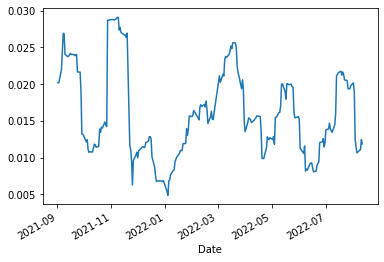

In [74]:
volatilidade_movel['ABEV3.SA'].plot()
volatilidade_fixa['ABEV3.SA']

In [68]:
volatilidade_fixa['ABEV3.SA']

0.2685401985766708

In [71]:
volatilidade_movel.mean() * np.sqrt(252)

ABEV3.SA    0.252347
BBDC4.SA    0.293327
BBSE3.SA    0.242058
BEEF3.SA    0.380948
EZTC3.SA    0.489785
ITSA4.SA    0.228573
JBSS3.SA    0.291198
JHSF3.SA    0.430668
MGLU3.SA    0.746958
MULT3.SA    0.356804
PETR4.SA    0.356472
TAEE3.SA    0.174334
VALE3.SA    0.367586
^BVSP       0.196975
dtype: float64

In [14]:
(retornos['ABEV3.SA'].dropna() +1).prod()-1    #PARA O RETORNO ACUMULADO NO PERÍODO

0.09717187500324198

In [17]:
# std = sqrt(vol)


lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print('desvio padrão: ',np.std(lista),' ; ','variância: ', np.var(lista),' ; ', 'raiz da variância: ', np.sqrt(np.var(lista)))

desvio padrão:  2.8722813232690143  ;  variância:  8.25  ;  raiz da variância:  2.8722813232690143


In [20]:
abev3 = yf.download('ABEV3.SA', startDate, endDate)

[*********************100%***********************]  1 of 1 completed


In [26]:
abev3.std() #amostra

Open         3.641043e-01
High         3.212421e-01
Low          3.218376e-01
Close        2.948900e-01
Adj Close    2.948900e-01
Volume       1.548212e+07
dtype: float64

In [27]:
np.std(abev3) #população

Open         3.561010e-01
High         3.141809e-01
Low          3.147634e-01
Close        2.884081e-01
Adj Close    2.884081e-01
Volume       1.514181e+07
dtype: float64